## PR曲线绘制（matplotlib）
https://www.yuque.com/huangzhongqing/hre6tf/bz88ccq3px8bax5z#dKV7n
codebase: https://blog.csdn.net/weixin_42196948/article/details/123510535

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
n_classes = 23

# np.save("target_labels.npy",target_labels)
# np.save("total_output_prob.npy",self.total_output_prob)

y_test = np.load("/home/chongqinghuang/code/lmv/target_labels.npy")
y_score = np.load("/home/chongqinghuang/code/lmv/total_output_prob.npy")
print(y_test.shape, y_score.shape)

(2963219, 23) (2963219, 23)


In [3]:
# 对三个分类以此计算precision、recall，并且运用micro方式对precision、recall求平均（也可以使用macro、weighted的方式进行求平均
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i],recall[i],_ = precision_recall_curve(y_test[:,i],y_score[:,i])
    average_precision[i] = average_precision_score(y_test[:,i],y_score[:,i])
    
precision["micro"],recall["micro"],_ = precision_recall_curve(y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(y_test,y_score,average="micro") 

/home/chongqinghuang/anaconda3/envs/waymo_38/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/waymo_38/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/waymo_38/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/waymo_38/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/waymo_38/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true

(1380, 1840, 4)
(1380, 1840, 4)


<Figure size 432x288 with 0 Axes>

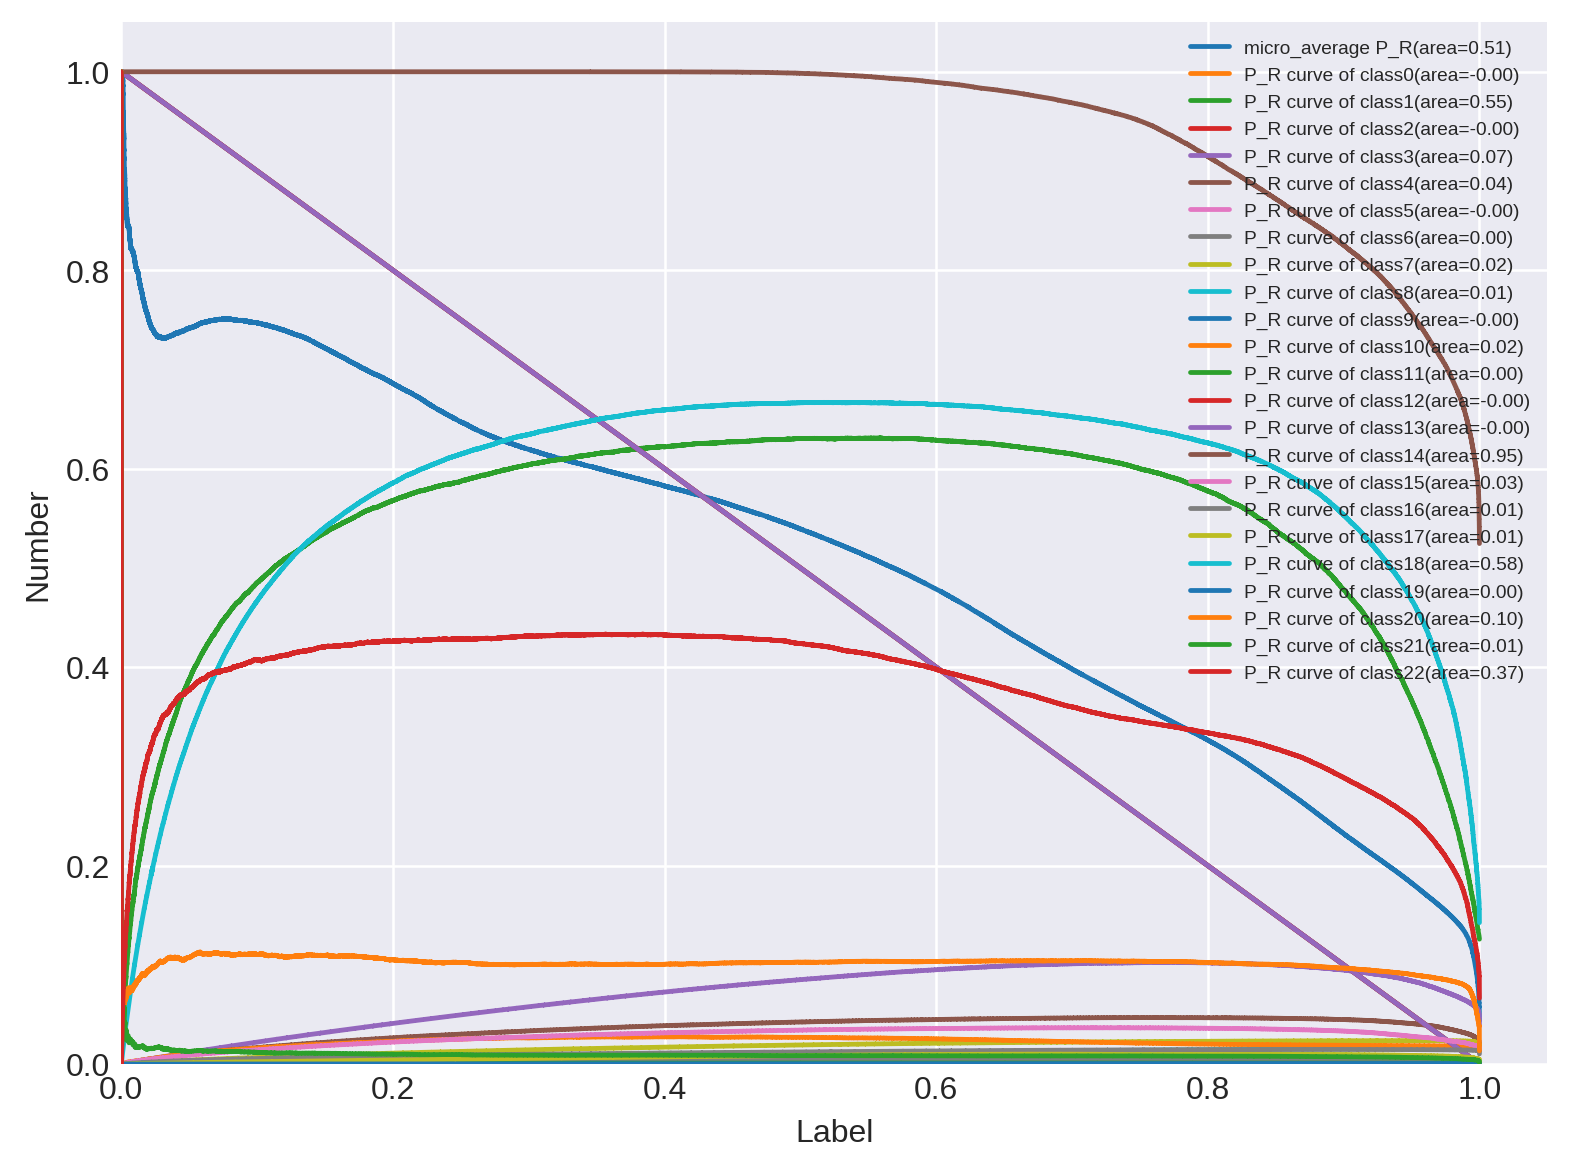

In [14]:
# 绘制P-R曲线
fig = plt.figure()
plt.clf()
# 创建一个点数为 8 x 6 的窗口, 并设置分辨率为 250像素/每英寸
plt.figure(figsize=(8, 6), dpi=230)
plt.plot(recall["micro"],precision["micro"],label = "micro_average P_R(area={0:0.2f})".format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i],precision[i],label = "P_R curve of class{0}(area={1:0.2f})".format(i,average_precision[i]))
 
plt.xlabel("Recall")  #设置X轴Y轴名称  
plt.ylabel("Precision")  
# plt.title("bar chart")
plt.style.use('seaborn-darkgrid') # 设置画图的风格 
# plt.figure(figsize=(10, 6), dpi=230)
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.legend(fontsize=6,loc="upper right") # 带颜色备注

# pyplot的绘图转换为numpy矩阵
def plt_numpy(plt):
    # Find the best implementation available on this platform
    #在python3.x中，StringIO已经在io模块中了，导入方法
    from io import BytesIO
    import PIL
    import cv2

    #申请缓冲地址
    buffer_ = BytesIO()#using buffer,great way!
    #保存在内存中，而不是在本地磁盘，注意这个默认认为你要保存的就是plt中的内容
    # 保存图片
    plt.savefig(buffer_,format = 'png')
    plt.savefig('squares_plot.png')
    buffer_.seek(0)
    #用PIL或CV2从内存中读取
    dataPIL = PIL.Image.open(buffer_)
    #转换为nparrary，PIL转换就非常快了,data即为所需
    data = np.asarray(dataPIL)
    print(data.shape)
    cv2.imwrite('filename.png', data)
    # plt.imsave('filename.jpeg', data)

    # cv2.imshow('image', data)
    #释放缓存    
    buffer_.close()

    return data
data = plt_numpy(plt)
print(data.shape)

plt.show()